# Import relevant library

In [1]:
!!pip install TextBlob

['Collecting TextBlob',
 '  Downloading textblob-0.15.3-py2.py3-none-any.whl (636 kB)',
 'Requirement already satisfied: nltk>=3.1 in c:\\users\\selor\\anaconda3\\lib\\site-packages (from TextBlob) (3.5)',
 'Requirement already satisfied: click in c:\\users\\selor\\anaconda3\\lib\\site-packages (from nltk>=3.1->TextBlob) (7.1.2)',
 'Requirement already satisfied: regex in c:\\users\\selor\\anaconda3\\lib\\site-packages (from nltk>=3.1->TextBlob) (2020.10.15)',
 'Requirement already satisfied: tqdm in c:\\users\\selor\\anaconda3\\lib\\site-packages (from nltk>=3.1->TextBlob) (4.50.2)',
 'Requirement already satisfied: joblib in c:\\users\\selor\\anaconda3\\lib\\site-packages (from nltk>=3.1->TextBlob) (0.17.0)',
 'Installing collected packages: TextBlob',
 'Successfully installed TextBlob-0.15.3']

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob #check this library asap

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# Twitter data cleaning

## Load tweeter file data from the previous chapter

In [3]:
data=pd.read_csv('brexit.csv')
#clean http links
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
data['text']=[remove_url(i) for i in data['text']]
#put all the data to low case
#data['text'] = [word.lower() for word in data['text'][0].split()]

# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in data['text']]
#words_in_tweet[:2]

# Twitter sentiment analysis

In [4]:
sentiment_objects = [TextBlob(tweet) for tweet in data['text']]

sentiment_objects[0].polarity, sentiment_objects[0]


sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.5,
 'JOHN BERCOWI voted for Khanfar and best candidatedeserved a second termThe dwarfs hatred for the Conser']

In [5]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.to_csv('twitter_sentiment_analysis_results.csv')
sentiment_df.head()

,polarity,tweet
0,0.5,JOHN BERCOWI voted for Khanfar and best candid...
1,0.5,montie StephenLloydEBN How is winning more sea...
2,0.0,heraldscotland 7 years ago maybe Brexit Englan...
3,0.0,JamesNathan333 ParlezmenTory mobrexit StillBat...
4,0.0,Tory line going into future GE will be somethi...


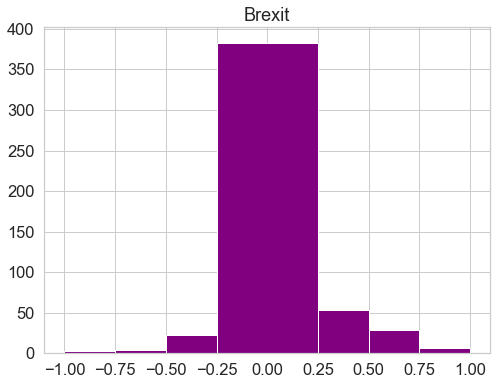

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Brexit")
plt.show()